# Homework 10
Ross Freeman

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

In [2]:
v_max = 28
tb = 1
k = 0.2
T = 100

In [3]:
def brake_rule(t):
    return k * t * np.exp((tb - t) / tb)

## Forward Euler Method

In [4]:
def for_euler(t, h, res):
    ind = int(t / h)
    if(ind < res.size):
        return res[ind]
    else:
        return for_euler(t - h, h, res) - h*v_max*brake_rule(t-h)

In [5]:
def euler_wrap(h):
    euler_res = np.asarray([0])

    t = h
    step = 1
    while t < T:
        euler_res = np.append(euler_res, for_euler(t, h, euler_res))
        step += 1
        t = step * h

    return euler_res

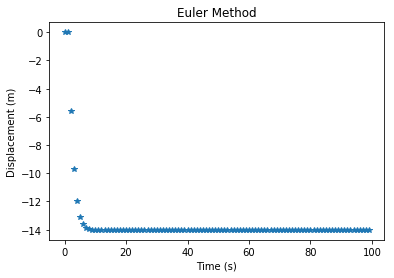

In [6]:
h = 1

plt.figure()
plt.title("Euler Method")
plt.xlabel('Time (s)')
plt.ylabel('Displacement (m)')
plt.plot(np.arange(0, 100, h), euler_wrap(h), '*')
plt.show()

In [7]:
num_res = np.asarray([0])

def num_approx(t):
    n = 1
    max_step = t / h
    result = 0
    
    while n < max_step:
        result += h/2 * (brake_rule(h * (n-1)) + brake_rule(h * n))
        n += 1
    return - v_max * result

In [8]:
t = h
step = 1
while t < T:
    num_res = np.append(num_res, num_approx(t))
    step += 1
    t = step * h


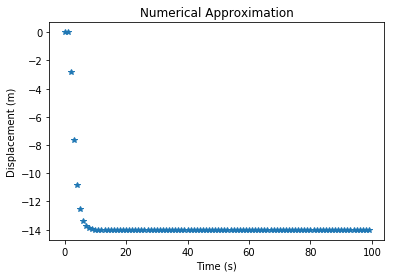

In [9]:
plt.figure()
plt.title("Numerical Approximation")
plt.xlabel('Time (s)')
plt.ylabel('Displacement (m)')
plt.plot(np.arange(0, 100, h), num_res, '*')
plt.show()

## Explicit Integration

In [10]:
exp_res = np.asarray([0])

t = h
step = 1
while t < T:
    int_val = -v_max * quad(brake_rule, 0, t)[0]
    exp_res = np.append(exp_res, int_val)
    step += 1
    t = step * h

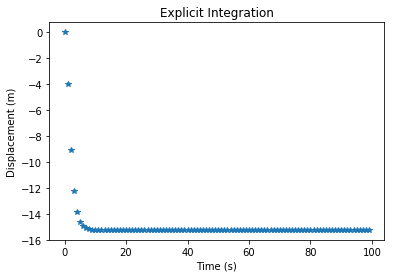

In [11]:
plt.figure()
plt.title("Explicit Integration")
plt.xlabel('Time (s)')
plt.ylabel('Displacement (m)')
plt.plot(np.arange(0, 100, h), exp_res, '*')
plt.show()

## Exercise 2

In [75]:
p_max = 40
d = 19
h = 0.01
num_cars = int(p_max / np.e)
tau = h * 5.0

car_matrix = euler_wrap(h).reshape(1, int(100/h)) # First car

curr_car = np.asarray([0])

def dde(car, t):
    ind = int(t/h)
    if(t < 0):
        print(t, car, 0)
        return 0
    if(car_matrix.ndim == 1 and car < 1): # Check if it's first iteration
        print(t, car, car_matrix[ind])
        return car_matrix[ind]
    elif(car_matrix.ndim > 1 and car < car_matrix.shape[0]): # See if previous car
        print(t, car, car_matrix[car][ind])
        return car_matrix[car][ind]
    elif(ind < curr_car.size): # See if previous value
        print(t, car, curr_car[ind])
        return curr_car[ind]
    else:
        inner = 1 + p_max / np.e * (dde(car - 1, t - tau) - dde(car, t - tau))
        print(t, car, dde(car, t - h) + h * v_max * np.log(inner))
        return dde(car, t - h) + h * v_max * np.log(inner)

In [76]:
car = 1
while car < 2:    
    t = h
    step = 1
    while t < T:
        curr_car = np.append(curr_car, dde(car, t))
        print(curr_car)
        step += 1
        t = step * h
    car_matrix = np.vstack((car_matrix, curr_car))
    car += 1
    curr_car = np.asarray([])

-0.04 0 0
-0.04 1 0
0.0 1 0
0.01 1 0.0
0.0 1 0
[ 0.  0.]
-0.030000000000000002 0 0
-0.030000000000000002 1 0
0.01 1 0.0
0.02 1 0.0
0.01 1 0.0
[ 0.  0.  0.]
-0.020000000000000004 0 0
-0.020000000000000004 1 0
0.019999999999999997 1 0.0
0.03 1 0.0
0.019999999999999997 1 0.0
[ 0.  0.  0.  0.]
-0.010000000000000002 0 0
-0.010000000000000002 1 0
0.03 1 0.0
0.04 1 0.0
0.03 1 0.0
[ 0.  0.  0.  0.  0.]
0.0 0 0.0
0.0 1 0.0
0.04 1 0.0
0.05 1 0.0
0.04 1 0.0
[ 0.  0.  0.  0.  0.  0.]
0.009999999999999995 0 0.0
0.009999999999999995 1 0.0
0.049999999999999996 1 0.0
0.06 1 0.0
0.049999999999999996 1 0.0
[ 0.  0.  0.  0.  0.  0.  0.]
0.020000000000000004 0 -0.00150709130452
0.020000000000000004 1 0.0
0.060000000000000005 1 0.0
0.07 1 -0.00627948323371
0.060000000000000005 1 0.0
[ 0.          0.          0.          0.          0.          0.          0.
 -0.00627948]
0.03 0 -0.00298419099096
0.03 1 0.0
0.07 1 -0.00627948323371
0.08 1 -0.0188532365613
0.07 1 -0.00627948323371
[ 0.          0.          

/Users/rossfreeman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in log
/Users/rossfreeman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in log


 nan
[ 0.          0.          0.          0.          0.          0.          0.
 -0.00627948 -0.01885324 -0.03142699 -0.09223693 -0.1602541  -0.22827127
 -0.29463112 -0.35411937 -0.35411937 -0.11879744  0.1977717   0.25761526
  0.67596162  1.09324199  1.09324199  0.98786622         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan]
0.32 0 -0.485228240471
0.32 1 nan
0.36 1 nan
0.37 1 nan
0.36 1 nan
[ 0.          0.          0.          0.          0.          0.          0.
 -0.00627948 -0.01885324 -0.03142699 -0.09223693 -0.1602541  -0.22827127
 -0.29463112 -0.35411937 -0.35411937 -0.11879744  0.1977717   0.25761526
  0.67596162  1.09324199  1.09324199  0.98786622         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan]
0.33 0 -0.520600129432
0.33 1

1.0 1 nan
1.04 1 nan
1.05 1 nan
1.04 1 nan
[ 0.          0.          0.          0.          0.          0.          0.
 -0.00627948 -0.01885324 -0.03142699 -0.09223693 -0.1602541  -0.22827127
 -0.29463112 -0.35411937 -0.35411937 -0.11879744  0.1977717   0.25761526
  0.67596162  1.09324199  1.09324199  0.98786622         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
    

1.76 1 nan
1.8 1 nan
1.81 1 nan
1.8 1 nan
[ 0.          0.          0.          0.          0.          0.          0.
 -0.00627948 -0.01885324 -0.03142699 -0.09223693 -0.1602541  -0.22827127
 -0.29463112 -0.35411937 -0.35411937 -0.11879744  0.1977717   0.25761526
  0.67596162  1.09324199  1.09324199  0.98786622         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
     

2.6 0 -10.3098079851
2.6 1 nan
2.64 1 nan
2.65 1 nan
2.64 1 nan
[ 0.          0.          0.          0.          0.          0.          0.
 -0.00627948 -0.01885324 -0.03142699 -0.09223693 -0.1602541  -0.22827127
 -0.29463112 -0.35411937 -0.35411937 -0.11879744  0.1977717   0.25761526
  0.67596162  1.09324199  1.09324199  0.98786622         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan        

3.18 0 -11.7386020621
3.18 1 nan
3.22 1 nan
3.23 1 nan
3.22 1 nan
[ 0.          0.          0.          0.          0.          0.          0.
 -0.00627948 -0.01885324 -0.03142699 -0.09223693 -0.1602541  -0.22827127
 -0.29463112 -0.35411937 -0.35411937 -0.11879744  0.1977717   0.25761526
  0.67596162  1.09324199  1.09324199  0.98786622         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan      

3.73 1 nan
3.72 1 nan
[ 0.          0.          0.          0.          0.          0.          0.
 -0.00627948 -0.01885324 -0.03142699 -0.09223693 -0.1602541  -0.22827127
 -0.29463112 -0.35411937 -0.35411937 -0.11879744  0.1977717   0.25761526
  0.67596162  1.09324199  1.09324199  0.98786622         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan 

4.33 1 nan
4.34 1 nan
4.33 1 nan
[ 0.          0.          0.          0.          0.          0.          0.
 -0.00627948 -0.01885324 -0.03142699 -0.09223693 -0.1602541  -0.22827127
 -0.29463112 -0.35411937 -0.35411937 -0.11879744  0.1977717   0.25761526
  0.67596162  1.09324199  1.09324199  0.98786622         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan  

5.0200000000000005 0 -13.647070359
5.0200000000000005 1 nan
5.0600000000000005 1 nan
5.07 1 nan
5.0600000000000005 1 nan
[ 0.          0.          0.          0.          0.          0.          0.
 -0.00627948 -0.01885324 -0.03142699 -0.09223693 -0.1602541  -0.22827127
 -0.29463112 -0.35411937 -0.35411937 -0.11879744  0.1977717   0.25761526
  0.67596162  1.09324199  1.09324199  0.98786622         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan

5.63 1 nan
5.67 1 nan
5.68 1 nan
5.67 1 nan
[ 0.          0.          0.          0.          0.          0.          0.
 -0.00627948 -0.01885324 -0.03142699 -0.09223693 -0.1602541  -0.22827127
 -0.29463112 -0.35411937 -0.35411937 -0.11879744  0.1977717   0.25761526
  0.67596162  1.09324199  1.09324199  0.98786622         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
   

6.25 0 -14.0408587014
6.25 1 nan
6.29 1 nan
6.3 1 nan
6.29 1 nan
[ 0.          0.          0.          0.          0.          0.          0.
 -0.00627948 -0.01885324 -0.03142699 -0.09223693 -0.1602541  -0.22827127
 -0.29463112 -0.35411937 -0.35411937 -0.11879744  0.1977717   0.25761526
  0.67596162  1.09324199  1.09324199  0.98786622         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan       

6.87 0 -14.129874095
6.87 1 nan
6.91 1 nan
6.92 1 nan
6.91 1 nan
[ 0.          0.          0.          0.          0.          0.          0.
 -0.00627948 -0.01885324 -0.03142699 -0.09223693 -0.1602541  -0.22827127
 -0.29463112 -0.35411937 -0.35411937 -0.11879744  0.1977717   0.25761526
  0.67596162  1.09324199  1.09324199  0.98786622         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan       

7.49 1 nan
7.53 1 nan
7.54 1 nan
7.53 1 nan
[ 0.          0.          0.          0.          0.          0.          0.
 -0.00627948 -0.01885324 -0.03142699 -0.09223693 -0.1602541  -0.22827127
 -0.29463112 -0.35411937 -0.35411937 -0.11879744  0.1977717   0.25761526
  0.67596162  1.09324199  1.09324199  0.98786622         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
   

8.17 1 nan
8.18 1 nan
8.17 1 nan
[ 0.          0.          0.          0.          0.          0.          0.
 -0.00627948 -0.01885324 -0.03142699 -0.09223693 -0.1602541  -0.22827127
 -0.29463112 -0.35411937 -0.35411937 -0.11879744  0.1977717   0.25761526
  0.67596162  1.09324199  1.09324199  0.98786622         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan  

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


 nan
9.870000000000001 1 nan
9.860000000000001 1 nan
[ 0.          0.          0.          0.          0.          0.          0.
 -0.00627948 -0.01885324 -0.03142699 -0.09223693 -0.1602541  -0.22827127
 -0.29463112 -0.35411937 -0.35411937 -0.11879744  0.1977717   0.25761526
  0.67596162  1.09324199  1.09324199  0.98786622         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan       

[  0.   0.   0. ...,  nan  nan  nan]
10.74 0 -14.2436579166
10.74 1 nan
10.780000000000001 1 nan
10.790000000000001 1 nan
10.780000000000001 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
10.75 0 -14.2436933297
10.75 1 nan
10.790000000000001 1 nan
10.8 1 nan
10.790000000000001 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
10.76 0 -14.2437284231
10.76 1 nan
10.8 1 nan
10.81 1 nan
10.8 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
10.77 0 -14.2437631996
10.77 1 nan
10.81 1 nan
10.82 1 nan
10.81 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
10.78 0 -14.2437976621
10.78 1 nan
10.82 1 nan
10.83 1 nan
10.82 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
10.79 0 -14.2438318134
10.79 1 nan
10.83 1 nan
10.84 1 nan
10.83 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
10.799999999999999 0 -14.2438318134
10.799999999999999 1 nan
10.84 1 nan
10.85 1 nan
10.84 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
10.809999999999999 0 -14.2438656562
10.809999999999999 1 nan
10.85 1 nan
10.86 1 nan
10.85 1 nan
[  0.   0.   0. ...,  

11.700000000000001 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
11.67 0 -14.2458907653
11.67 1 nan
11.71 1 nan
11.72 1 nan
11.71 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
11.68 0 -14.2459059476
11.68 1 nan
11.72 1 nan
11.73 1 nan
11.72 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
11.69 0 -14.2459209917
11.69 1 nan
11.73 1 nan
11.74 1 nan
11.73 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
11.7 0 -14.2459358989
11.7 1 nan
11.74 1 nan
11.75 1 nan
11.74 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
11.709999999999999 0 -14.2459358989
11.709999999999999 1 nan
11.75 1 nan
11.76 1 nan
11.75 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
11.719999999999999 0 -14.2459506703
11.719999999999999 1 nan
11.76 1 nan
11.77 1 nan
11.76 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
11.729999999999999 0 -14.2459653073
11.729999999999999 1 nan
11.77 1 nan
11.78 1 nan
11.77 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
11.74 0 -14.2459941826
11.74 1 nan
11.780000000000001 1 nan
11.790000000000001 1 nan
11.780000000000001 1 

12.65 1 nan
12.690000000000001 1 nan
12.700000000000001 1 nan
12.690000000000001 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
12.66 0 -14.246883291
12.66 1 nan
12.700000000000001 1 nan
12.71 1 nan
12.700000000000001 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
12.67 0 -14.246889411
12.67 1 nan
12.71 1 nan
12.72 1 nan
12.71 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
12.68 0 -14.2468954748
12.68 1 nan
12.72 1 nan
12.73 1 nan
12.72 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
12.69 0 -14.246901483
12.69 1 nan
12.73 1 nan
12.74 1 nan
12.73 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
12.7 0 -14.2469074362
12.7 1 nan
12.74 1 nan
12.75 1 nan
12.74 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
12.709999999999999 0 -14.2469074362
12.709999999999999 1 nan
12.75 1 nan
12.76 1 nan
12.75 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
12.719999999999999 0 -14.2469133348
12.719999999999999 1 nan
12.76 1 nan
12.77 1 nan
12.76 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
12.73 0 -14.2469249701
12.73 1 nan
12.770000000

13.61 1 nan
13.6 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
13.57 0 -14.2472618611
13.57 1 nan
13.610000000000001 1 nan
13.620000000000001 1 nan
13.610000000000001 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
13.58 0 -14.2472645016
13.58 1 nan
13.620000000000001 1 nan
13.63 1 nan
13.620000000000001 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
13.59 0 -14.2472671178
13.59 1 nan
13.63 1 nan
13.64 1 nan
13.63 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
13.6 0 -14.2472697098
13.6 1 nan
13.64 1 nan
13.65 1 nan
13.64 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
13.61 0 -14.2472722779
13.61 1 nan
13.65 1 nan
13.66 1 nan
13.65 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
13.62 0 -14.2472748224
13.62 1 nan
13.66 1 nan
13.67 1 nan
13.66 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
13.629999999999999 0 -14.2472748224
13.629999999999999 1 nan
13.67 1 nan
13.68 1 nan
13.67 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
13.639999999999999 0 -14.2472773434
13.639999999999999 1 nan
13.68 1 nan
13.69 1 nan
13.68 1 na

14.51 1 nan
14.55 1 nan
14.56 1 nan
14.55 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
14.52 0 -14.2474293512
14.52 1 nan
14.56 1 nan
14.57 1 nan
14.56 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
14.53 0 -14.2474304439
14.53 1 nan
14.57 1 nan
14.58 1 nan
14.57 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
14.54 0 -14.2474304439
14.54 1 nan
14.58 1 nan
14.59 1 nan
14.58 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
14.549999999999999 0 -14.2474315265
14.549999999999999 1 nan
14.59 1 nan
14.6 1 nan
14.59 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
14.559999999999999 0 -14.247432599
14.559999999999999 1 nan
14.6 1 nan
14.61 1 nan
14.6 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
14.57 0 -14.2474347143
14.57 1 nan
14.610000000000001 1 nan
14.620000000000001 1 nan
14.610000000000001 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
14.58 0 -14.2474357572
14.58 1 nan
14.620000000000001 1 nan
14.63 1 nan
14.620000000000001 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
14.59 0 -14.2474367905
14.59 1 nan
14.63 1 nan

15.459999999999999 1 nan
15.5 1 nan
15.51 1 nan
15.5 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
15.469999999999999 0 -14.2474980782
15.469999999999999 1 nan
15.51 1 nan
15.52 1 nan
15.51 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
15.48 0 -14.2474989829
15.48 1 nan
15.520000000000001 1 nan
15.530000000000001 1 nan
15.520000000000001 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
15.49 0 -14.247499429
15.49 1 nan
15.530000000000001 1 nan
15.540000000000001 1 nan
15.530000000000001 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
15.5 0 -14.2474998709
15.5 1 nan
15.540000000000001 1 nan
15.55 1 nan
15.540000000000001 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
15.51 0 -14.2475003086
15.51 1 nan
15.55 1 nan
15.56 1 nan
15.55 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
15.52 0 -14.2475007423
15.52 1 nan
15.56 1 nan
15.57 1 nan
15.56 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
15.53 0 -14.247501172
15.53 1 nan
15.57 1 nan
15.58 1 nan
15.57 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
15.54 0 -14.247501172


16.47 1 nan
16.48 1 nan
16.47 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
16.44 0 -14.2475230436
16.44 1 nan
16.48 1 nan
16.490000000000002 1 nan
16.48 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
16.45 0 -14.2475230419
16.45 1 nan
16.49 1 nan
16.5 1 nan
16.49 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
16.46 0 -14.2475232215
16.46 1 nan
16.5 1 nan
16.51 1 nan
16.5 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
16.47 0 -14.2475232215
16.47 1 nan
16.509999999999998 1 nan
16.52 1 nan
16.509999999999998 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
16.48 0 -14.2475233979
16.48 1 nan
16.52 1 nan
16.53 1 nan
16.52 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
16.54 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
16.5 0 -14.2475235709
16.5 1 nan
16.54 1 nan
16.55 1 nan
16.54 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
16.56 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
16.52 0 -14.2475237408
16.52 1 nan
16.56 1 nan
16.57 1 nan
16.56 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
16.53 0 -14.247523909
16.53 1 nan
16.57

17.57 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
17.54 0 -14.2475299379
17.54 1 nan
17.58 1 nan
17.59 1 nan
17.58 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
17.55 0 -14.2475300023
17.55 1 nan
17.59 1 nan
17.6 1 nan
17.59 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
17.56 0 -14.2475300023
17.56 1 nan
17.599999999999998 1 nan
17.61 1 nan
17.599999999999998 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
17.57 0 -14.2475300655
17.57 1 nan
17.61 1 nan
17.62 1 nan
17.61 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
17.63 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
17.59 0 -14.2475301276
17.59 1 nan
17.63 1 nan
17.64 1 nan
17.63 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
17.6 0 -14.247530189
17.6 1 nan
17.64 1 nan
17.650000000000002 1 nan
17.64 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
17.61 0 -14.2475301884
17.61 1 nan
17.65 1 nan
17.66 1 nan
17.65 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
17.62 0 -14.2475302487
17.62 1 nan
17.66 1 nan
17.67 1 nan
17.66 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
17.

18.63 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
18.6 0 -14.2475323843
18.6 1 nan
18.64 1 nan
18.650000000000002 1 nan
18.64 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
18.61 0 -14.2475323841
18.61 1 nan
18.65 1 nan
18.66 1 nan
18.65 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
18.62 0 -14.2475324075
18.62 1 nan
18.66 1 nan
18.67 1 nan
18.66 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
18.63 0 -14.2475324075
18.63 1 nan
18.669999999999998 1 nan
18.68 1 nan
18.669999999999998 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
18.64 0 -14.2475324305
18.64 1 nan
18.68 1 nan
18.69 1 nan
18.68 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
18.65 0 -14.2475324305
18.65 1 nan
18.689999999999998 1 nan
18.7 1 nan
18.689999999999998 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
18.66 0 -14.2475324531
18.66 1 nan
18.7 1 nan
18.71 1 nan
18.7 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
18.72 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
18.68 0 -14.2475324752
18.68 1 nan
18.72 1 nan
18.73 1 nan
18.72 1 nan
[  0.   0.   0.

19.64 0 -14.2475332546
19.64 1 nan
19.68 1 nan
19.69 1 nan
19.68 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
19.65 0 -14.2475332546
19.65 1 nan
19.689999999999998 1 nan
19.7 1 nan
19.689999999999998 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
19.66 0 -14.2475332634
19.66 1 nan
19.7 1 nan
19.71 1 nan
19.7 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
19.72 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
19.68 0 -14.247533272
19.68 1 nan
19.72 1 nan
19.73 1 nan
19.72 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
19.69 0 -14.2475332805
19.69 1 nan
19.73 1 nan
19.740000000000002 1 nan
19.73 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
19.7 0 -14.2475332804
19.7 1 nan
19.74 1 nan
19.75 1 nan
19.74 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
19.71 0 -14.2475332887
19.71 1 nan
19.75 1 nan
19.76 1 nan
19.75 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
19.72 0 -14.2475332887
19.72 1 nan
19.759999999999998 1 nan
19.77 1 nan
19.759999999999998 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
19.73 0 -14.2475332969
19.73

20.74 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
20.71 0 -14.2475335978
20.71 1 nan
20.75 1 nan
20.76 1 nan
20.75 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
20.72 0 -14.2475335978
20.72 1 nan
20.759999999999998 1 nan
20.77 1 nan
20.759999999999998 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
20.73 0 -14.247533601
20.73 1 nan
20.77 1 nan
20.78 1 nan
20.77 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
20.74 0 -14.2475336041
20.74 1 nan
20.779999999999998 1 nan
20.79 1 nan
20.779999999999998 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
20.75 0 -14.2475336072
20.75 1 nan
20.79 1 nan
20.8 1 nan
20.79 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
20.759999999999998 0 -14.2475336072
20.759999999999998 1 nan
20.799999999999997 1 nan
20.81 1 nan
20.799999999999997 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
20.77 0 -14.2475336102
20.77 1 nan
20.81 1 nan
20.82 1 nan
20.81 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
20.78 0 -14.2475336133
20.78 1 nan
20.82 1 nan
20.830000000000002 1 nan
20.82 1 nan
[  0.   0

21.669999999999998 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
21.64 0 -14.2475337314
21.64 1 nan
21.68 1 nan
21.69 1 nan
21.68 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
21.65 0 -14.2475337328
21.65 1 nan
21.689999999999998 1 nan
21.7 1 nan
21.689999999999998 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
21.66 0 -14.2475337341
21.66 1 nan
21.7 1 nan
21.71 1 nan
21.7 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
21.669999999999998 0 -14.2475337341
21.669999999999998 1 nan
21.709999999999997 1 nan
21.72 1 nan
21.709999999999997 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
21.68 0 -14.2475337354
21.68 1 nan
21.72 1 nan
21.73 1 nan
21.72 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
21.69 0 -14.2475337366
21.69 1 nan
21.73 1 nan
21.740000000000002 1 nan
21.73 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
21.7 0 -14.2475337366
21.7 1 nan
21.74 1 nan
21.75 1 nan
21.74 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
21.71 0 -14.2475337379
21.71 1 nan
21.75 1 nan
21.76 1 nan
21.75 1 nan
[  0.   0.   0. ...,  nan

22.56 1 nan
22.599999999999998 1 nan
22.61 1 nan
22.599999999999998 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
22.57 0 -14.2475337867
22.57 1 nan
22.61 1 nan
22.62 1 nan
22.61 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
22.58 0 -14.2475337872
22.58 1 nan
22.619999999999997 1 nan
22.63 1 nan
22.619999999999997 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
22.59 0 -14.2475337878
22.59 1 nan
22.63 1 nan
22.64 1 nan
22.63 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
22.6 0 -14.2475337883
22.6 1 nan
22.64 1 nan
22.650000000000002 1 nan
22.64 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
22.61 0 -14.2475337883
22.61 1 nan
22.65 1 nan
22.66 1 nan
22.65 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
22.62 0 -14.2475337888
22.62 1 nan
22.66 1 nan
22.67 1 nan
22.66 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
22.63 0 -14.2475337888
22.63 1 nan
22.669999999999998 1 nan
22.68 1 nan
22.669999999999998 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
22.64 0 -14.2475337893
22.64 1 nan
22.68 1 nan
22.69 1 nan
22.68 1 nan

23.549999999999997 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
23.52 0 -14.24753381
23.52 1 nan
23.56 1 nan
23.57 1 nan
23.56 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
23.53 0 -14.2475338102
23.53 1 nan
23.57 1 nan
23.580000000000002 1 nan
23.57 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
23.54 0 -14.2475338102
23.54 1 nan
23.58 1 nan
23.59 1 nan
23.58 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
23.55 0 -14.2475338104
23.55 1 nan
23.59 1 nan
23.6 1 nan
23.59 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
23.56 0 -14.2475338104
23.56 1 nan
23.599999999999998 1 nan
23.61 1 nan
23.599999999999998 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
23.57 0 -14.2475338106
23.57 1 nan
23.61 1 nan
23.62 1 nan
23.61 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
23.58 0 -14.2475338108
23.58 1 nan
23.619999999999997 1 nan
23.63 1 nan
23.619999999999997 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
23.59 0 -14.247533811
23.59 1 nan
23.63 1 nan
23.64 1 nan
23.63 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
23.6 0 -14.24

24.48 1 nan
24.490000000000002 1 nan
24.48 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
24.45 0 -14.2475338193
24.45 1 nan
24.49 1 nan
24.5 1 nan
24.49 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
24.46 0 -14.2475338194
24.46 1 nan
24.5 1 nan
24.51 1 nan
24.5 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
24.47 0 -14.2475338194
24.47 1 nan
24.509999999999998 1 nan
24.52 1 nan
24.509999999999998 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
24.48 0 -14.2475338195
24.48 1 nan
24.52 1 nan
24.53 1 nan
24.52 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
24.49 0 -14.2475338196
24.49 1 nan
24.529999999999998 1 nan
24.54 1 nan
24.529999999999998 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
24.5 0 -14.2475338197
24.5 1 nan
24.54 1 nan
24.55 1 nan
24.54 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
24.51 0 -14.2475338198
24.51 1 nan
24.55 1 nan
24.560000000000002 1 nan
24.55 1 nan
[  0.   0.   0. ...,  nan  nan  nan]
24.52 0 -14.2475338198
24.52 1 nan
24.56 1 nan
24.57 1 nan
24.56 1 nan
[  0.   0.   0. ...,  nan  

KeyboardInterrupt: 

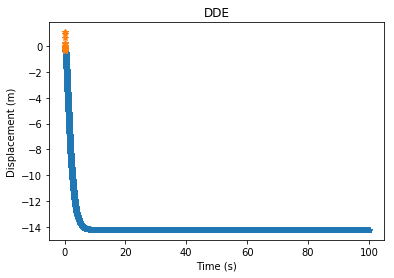

In [65]:
plt.figure()
plt.title("DDE")
plt.xlabel('Time (s)')
plt.ylabel('Displacement (m)')
plt.plot(np.arange(0, 100, h), car_matrix[0], '*')
plt.plot(np.arange(0, 100, h), car_matrix[1], '*')
# for row in car_matrix:
#     plt.plot(np.arange(0, 100, h), row, '*')
plt.show()

In [67]:
print(car_matrix[1][18])

0.257615261931
